In [1]:
from abrantes import abrantes
import networkx as nx
import numpy as np
import scipy.stats as st
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt

In [2]:
communities_sizes = 2**np.arange(3, 8)
communities_sizes

array([  8,  16,  32,  64, 128])

In [3]:
rpg = nx.random_partition_graph(communities_sizes, .9, .2/communities_sizes.sum())
len(rpg.nodes), len(rpg.edges)

(248, 9744)

In [4]:
ground_truth = [rpg.nodes[i]['block'] for i in range(communities_sizes.sum())]
normalized_entropy = st.entropy(communities_sizes)/np.log(len(communities_sizes))
normalized_entropy

np.float64(0.7721625797775639)

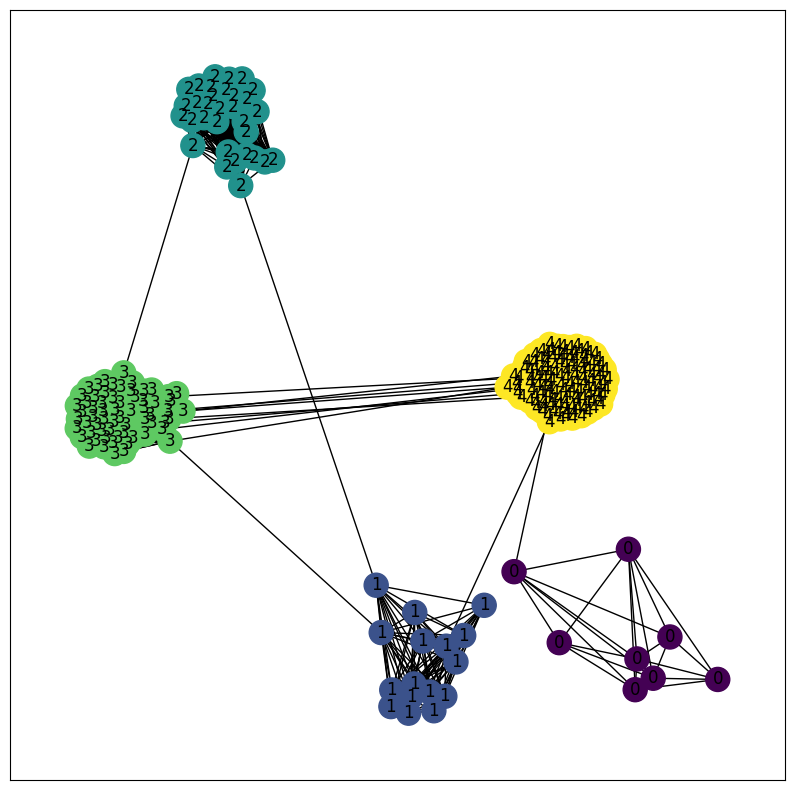

In [5]:
plt.figure(figsize=[10]*2)
nx.draw_networkx(rpg, pos=nx.spring_layout(rpg, .3), node_color=ground_truth, labels=dict(enumerate(ground_truth)))

In [7]:
def clusters_to_node_labels(graph, clusters):
    return [[i for i, j in enumerate(clusters) if n in j][0] for n in graph]
    
skmetrics.adjusted_rand_score(clusters_to_node_labels(rpg, communities), ground_truth)

0.9903164624784339

In [6]:
def target_number_of_communities_found(communities):
    return len(communities) == len(communities_sizes)

def less_dense_subnets_first(subnet, network):
    return nx.density(subnet) if len(subnet) > 1 else 1

communities = abrantes(rpg, target_number_of_communities_found, less_dense_subnets_first)

In [8]:
skmetrics.cluster.contingency_matrix(clusters_to_node_labels(rpg, communities), ground_truth)

array([[  8,   0,   0,   0,   1],
       [  0,  16,   0,   0,   0],
       [  0,   0,  32,   0,   0],
       [  0,   0,   0,  64,   0],
       [  0,   0,   0,   0, 127]])

In [9]:
def largest_subnets_first(subnet, network):
    return -len(subnet)

communities = abrantes(rpg, target_number_of_communities_found, largest_subnets_first)

In [10]:
skmetrics.adjusted_rand_score(clusters_to_node_labels(rpg, communities), ground_truth)

0.6390267420709022

In [11]:
skmetrics.cluster.contingency_matrix(clusters_to_node_labels(rpg, communities), ground_truth)

array([[ 0,  0,  0,  0, 68],
       [ 0,  0,  0, 64,  0],
       [ 8,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 59],
       [ 0, 16, 32,  0,  0]])